In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import tensorflow
from tensorflow import keras
from keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test,y_test) = mnist.load_data()

In [3]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
type(X_train)

numpy.ndarray

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

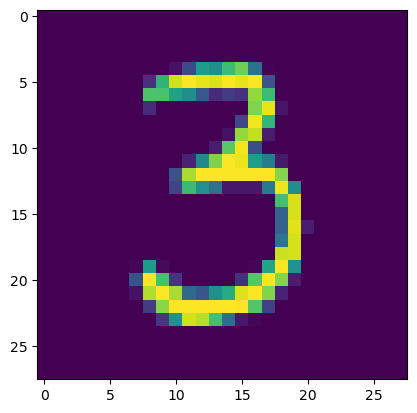

In [7]:
plt.imshow(X_train[50])

In [8]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [9]:
np.unique(X_train)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
X_train.shape[0]

60000

In [12]:
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = X_train.shape
IMAGE_CHANNELS = 1

In [13]:
X_train_channels = X_train.reshape(X_train.shape[0], IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)

In [14]:
X_train_channels.shape

(60000, 28, 28, 1)

In [15]:
X_test_channels = X_test.reshape(X_test.shape[0], IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)

In [16]:
X_test_channels.shape

(10000, 28, 28, 1)

In [17]:
#Normalizing
X_train = X_train_channels/255
X_test = X_test_channels/255

In [18]:
model = keras.Sequential()

In [19]:
model.add(keras.layers.Convolution2D(input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS), filters = 8, kernel_size = 5,
                                     strides = 1, activation="relu", kernel_initializer=keras.initializers.VarianceScaling()
                                    ))

In [20]:
model.add(keras.layers.MaxPooling2D(strides=(2,2)))

In [21]:
model = keras.models.Sequential()

model.add(keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=keras.activations.relu,
    kernel_initializer=keras.initializers.VarianceScaling()
))

model.add(keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=keras.activations.relu,
    kernel_initializer=keras.initializers.VarianceScaling()
))

model.add(keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(
    units=128,
    activation=keras.activations.relu
));

model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(
    units=10,
    activation=keras.activations.softmax,
    kernel_initializer=keras.initializers.VarianceScaling()
))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 24, 24, 8)         208       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 16)          3216      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)              

In [23]:
keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [24]:
model.compile(optimizer = "adam", loss="sparse_categorical_crossentropy", metrics="accuracy")

In [25]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5


1875/1875 [==============================] - 14s 6ms/step - loss: 0.2148 - accuracy: 0.9348
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0720 - accuracy: 0.9780
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0533 - accuracy: 0.9837
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0428 - accuracy: 0.9869
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0347 - accuracy: 0.9891


In [26]:
model.evaluate(X_train, y_train)

1875/1875 [==============================] - 8s 4ms/step - loss: 0.0193 - accuracy: 0.9939


[0.01934128999710083, 0.9939166903495789]

In [27]:
model.save("hand_char_model.h5", save_format="h5")

C:\Users\Sona\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [28]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [29]:
from sklearn.metrics import confusion_matrix, classification_report

In [30]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [31]:
y_pred

array([[2.14486779e-11, 8.76873827e-08, 1.49951251e-09, ...,
        9.99998927e-01, 5.05146369e-10, 8.45352531e-07],
       [5.11137577e-09, 4.35649184e-07, 9.99999523e-01, ...,
        1.48432155e-08, 3.56737075e-08, 9.11557505e-13],
       [7.67313907e-07, 9.99895215e-01, 1.66235679e-07, ...,
        1.65663878e-05, 6.09465751e-05, 2.90976504e-06],
       ...,
       [1.75493246e-13, 9.45189349e-09, 3.79830238e-12, ...,
        1.68899350e-09, 2.48488981e-08, 8.36749834e-08],
       [7.49432807e-11, 9.30440417e-14, 4.48000967e-16, ...,
        1.13899709e-10, 8.13300448e-06, 6.55405330e-09],
       [3.53472696e-09, 5.00872066e-10, 1.38870415e-09, ...,
        1.82822859e-13, 3.54714724e-09, 9.34471181e-11]], dtype=float32)

In [32]:
y_pred.shape

(10000, 10)

In [33]:
y_pred_labels = [np.argmax(i) for i in y_pred]

In [34]:
y_pred_labels

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 5,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 9,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 2,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 3,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 2,
 4,
 2,


In [59]:
c = keras.utils.to_categorical(y_train)

In [60]:
c

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [35]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [36]:
type(y_pred)

numpy.ndarray

In [37]:
type(y_test)

numpy.ndarray

In [38]:
print(classification_report(y_test, y_pred_labels))
print(confusion_matrix(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

[[ 976    0    1    0    0    0    1    1    0    1]
 [   0 1130    1    0    0    0    2    2    0    0]
 [   1    0 1024    2    0    0    0    2    3    0]
 [   0    0    0 1007    0    2    0    0    0    1]
 [   0    0    1    0  968   

In [39]:
input_img = cv2.imread("MNIST_digit.png")

In [40]:
input_img.shape

(318, 318, 3)

In [41]:
grey_img = cv2.cvtColor(input_img, cv2.COLOR_RGB2GRAY)

In [42]:
grey_img.shape

(318, 318)

In [43]:
resized_img = cv2.resize(grey_img, (28,28))

In [44]:
resized_img=resized_img/255

In [45]:
resized_img

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

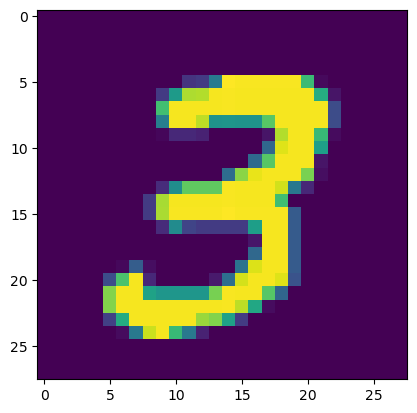

In [46]:
plt.imshow(resized_img)

In [47]:
resized_img.shape

(28, 28)

In [48]:
reshaped_img = np.reshape(resized_img, [1,28,28, 1])
reshaped_img.shape

(1, 28, 28, 1)

In [49]:
print(reshaped_img)

[[[[0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [

In [50]:
X_test[10]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [51]:
X_test.shape

(10000, 28, 28, 1)

In [52]:
reshaped_img.shape

(1, 28, 28, 1)

In [53]:
pred_img = model.predict(reshaped_img)

1/1 [==============================] - 0s 41ms/step


In [54]:
pred_img

array([[2.4955553e-18, 3.5519738e-12, 1.6374324e-12, 1.0000000e+00,
        6.2446530e-16, 4.6163713e-09, 1.0992896e-18, 3.7045259e-11,
        4.1008921e-09, 6.8836331e-10]], dtype=float32)

In [55]:
pred_img_num = [np.argmax(i) for i in pred_img]

In [56]:
pred_img_num

[3]

In [57]:
from sklearn.pipeline import Pipeline

In [58]:
image_preprocessing = Pipeline(steps=[
    ("grey_img", cv2.cvtColor(input_img, cv2.COLOR_RGB2GRAY)),
    ("resized_img", cv2.resize(grey_img, (28,28))),
    ("resized_img", resized_img/255)
])